In [1]:
import json
import numpy as np
tinyleo_name = 'tinyleo'
starlink_name = 'starlink'
with open(f'data/{tinyleo_name}_total_results_shortest.json', 'r') as f:
    tinyleo_anycast_result = json.load(f)
with open(f'data/{tinyleo_name}_total_results_anycast.json', 'r') as f:
    tinyleo_shortest_result = json.load(f)
with open(f'data/{starlink_name}_total_results_shortest.json', 'r') as f:
    starlink_anycast_result = json.load(f)
with open(f'data/{starlink_name}_total_results_anycast.json', 'r') as f:
    starlink_shortest_result = json.load(f)
with open(f'data/{starlink_name}_total_results_shortest_3isls.json', 'r') as f:
    starlink_3isl_shortest_result = json.load(f)

In [2]:
tinyleo_anycast_delays = []
tinyleo_anycast_hops = []
tinyleo_shorest_delays = []
tinyleo_shorest_hops = []

for gs1 in tinyleo_anycast_result:
    tinyleo_anycast_delays.append(tinyleo_anycast_result[gs1]['delay'])
    tinyleo_anycast_hops.append(len(tinyleo_anycast_result[gs1]['path']))

for gs1 in tinyleo_shortest_result:
    tinyleo_shorest_delays.append(tinyleo_shortest_result[gs1]['delay'])
    tinyleo_shorest_hops.append(len(tinyleo_shortest_result[gs1]['path']))

starlink_anycast_delays = []
starlink_anycast_hops = []
starlink_shorest_delays = []
starlink_shorest_hops = []

for gs1 in starlink_anycast_result:
    starlink_anycast_delays.append(starlink_anycast_result[gs1]['delay'])
    starlink_anycast_hops.append(len(starlink_anycast_result[gs1]['path']))
    
for gs1 in starlink_shortest_result:
    starlink_shorest_delays.append(starlink_shortest_result[gs1]['delay'])
    starlink_shorest_hops.append(len(starlink_shortest_result[gs1]['path']))

starlink_3isl_shorest_delays = []
starlink_3isl_shorest_hops = []
for gs1 in starlink_3isl_shortest_result:
    starlink_3isl_shorest_delays.append(starlink_3isl_shortest_result[gs1]['delay'])
    starlink_3isl_shorest_hops.append(len(starlink_3isl_shortest_result[gs1]['path']))

In [3]:
max_delays = 0
for item in [tinyleo_anycast_delays, tinyleo_shorest_delays,
             starlink_anycast_delays, starlink_shorest_delays, starlink_3isl_shorest_delays]:
    print(max(item))
    max_delays = max(max_delays, max(item))

139.64121633636356
95.44389658136967
189.65364053731741
83.17444208172428
371.6970542995267


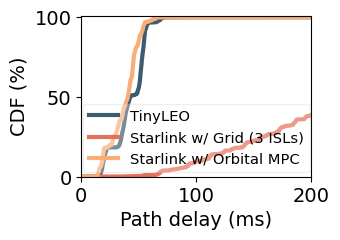

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set font type for PDF export
plt.rcParams['pdf.fonttype'] = 42 

def compute_cdf(data):
    """
    Compute the empirical CDF of given data.
    
    Args:
        data (list or ndarray): Input data to compute CDF for.
    
    Returns:
        tuple: (sorted data, corresponding CDF values in %)
    """
    data = np.sort(data)
    cdf = np.arange(1, len(data) + 1) * 100 / len(data)
    return data, cdf

def plot_cdf(data_list, labels, colors):
    """
    Plot CDF curves for multiple datasets.
    
    Args:
        data_list (list of list): Each element is a list of delay values.
        labels (list of str): Labels for each CDF curve.
        colors (list of str): Colors for each CDF curve.
    """
    plt.figure(figsize=(3.5, 2.5))
    
    for delays, label, color in zip(data_list, labels, colors):
        plot_delays = delays.copy()
        # Ensure CDF starts from 0 and covers maximum delay
        plot_delays.append(max_delays)
        plot_delays.append(0)

        x, y = compute_cdf(plot_delays)

        # Use dashed line for baseline method
        if label == 'Shortest path propagation delay':
            plt.plot(x, y, label=label, color=color, linewidth=4, linestyle='--')
        else:
            plt.plot(x, y, label=label, color=color, linewidth=3, linestyle='-')

    # Axis labels
    plt.xlabel('Path delay (ms)', fontsize=14)
    plt.ylabel('CDF (%)', fontsize=14)
    
    # Tick settings
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlim(0, 200)
    plt.ylim(0, 101)
    
    # Add legend
    legend = plt.legend(fontsize=10.6, loc='upper left', bbox_to_anchor=(-0.025, 0.5))
    legend.get_frame().set_alpha(0.3)

    plt.tight_layout()

    # Save to file
    plt.savefig('figures/figure19a_1.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('figures/figure19a_1.png', dpi=300, bbox_inches='tight')
    plt.show()

# ------------------------
# Prepare input data
# ------------------------

# List of delay datasets to plot
data_list = [
    tinyleo_shorest_delays,
    starlink_3isl_shorest_delays,
    starlink_shorest_delays
]

# Labels for the CDF curves
labels = [
    "TinyLEO",
    "Starlink w/ Grid (3 ISLs)",
    "Starlink w/ Orbital MPC"
]

# Color palette
colors = ['#3D5C6F', '#E47159', '#F9AE78']

# Max delay value (used to anchor CDF curves)
max_delays = max(max(delays) for delays in data_list)

# Plot
plot_cdf(data_list, labels, colors)

In [5]:
max_hops = 0
for item in [tinyleo_anycast_hops, tinyleo_shorest_hops,
             starlink_anycast_hops, starlink_shorest_hops, starlink_3isl_shorest_hops]:
    print(max(item))
    max_hops = max(max_hops, max(item))

59
44
65
40
81


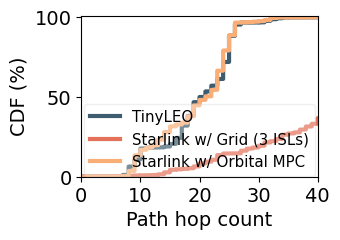

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def compute_cdf(data):
    """
    Compute the empirical CDF of given data.
    
    Args:
        data (list or ndarray): Input data.
    
    Returns:
        tuple: (sorted data, corresponding CDF values in %)
    """
    data = np.sort(data)
    cdf = np.arange(1, len(data) + 1) * 100 / len(data)
    return data, cdf

def plot_cdf(data_list, labels, colors):
    """
    Plot CDF curves for hop counts.
    
    Args:
        data_list (list of list): Each element is a list of hop counts.
        labels (list of str): Labels for each curve.
        colors (list of str): Corresponding colors.
    """
    plt.figure(figsize=(3.5, 2.5))

    for hops, label, color in zip(data_list, labels, colors):
        plot_hops = hops.copy()
        plot_hops.append(max_hops)  # Ensure CDF covers full hop range
        plot_hops.append(0)         # Ensure CDF starts at 0

        x, y = compute_cdf(plot_hops)

        plt.plot(x, y, label=label, color=color,
                 linewidth=4 if label == 'Shortest path propagation delay' else 3,
                 linestyle='-')

    plt.xlabel('Path hop count', fontsize=14)
    plt.ylabel('CDF (%)', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlim(0, 40)
    plt.ylim(0, 101)

    # Add legend
    legend = plt.legend(fontsize=10.8, loc='upper left', bbox_to_anchor=(-0.02, 0.5))
    legend.get_frame().set_alpha(0.3)

    plt.tight_layout()

    # Save the figure
    plt.savefig('figures/figure19a_2.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('figures/figure19a_2.png', dpi=300, bbox_inches='tight')
    plt.show()

# ------------------------
# Prepare input data
# ------------------------

# Input hop count lists
data_list = [
    tinyleo_shorest_hops,
    starlink_3isl_shorest_hops,
    starlink_shorest_hops
]

# Labels for the CDF curves
labels = [
    "TinyLEO",
    "Starlink w/ Grid (3 ISLs)",
    "Starlink w/ Orbital MPC"
]

# Color palette
colors = ['#3D5C6F', '#E47159', '#F9AE78']

# Maximum hop value (used to extend range)
max_hops = max(max(hops) for hops in data_list)

# Plot
plot_cdf(data_list, labels, colors)


In [7]:
anycast_stretch = []
for sat in tinyleo_anycast_result:
    anycast_stretch.append(tinyleo_anycast_result[sat]['delay'] / starlink_anycast_result[sat]['delay'])
shorest_stretch = []
for sat in tinyleo_shortest_result:
    shorest_stretch.append(tinyleo_shortest_result[sat]['delay'] / starlink_shortest_result[sat]['delay'])

In [8]:
grid_strech = []
for sat in tinyleo_shortest_result:
    grid_strech.append(tinyleo_shortest_result[sat]['delay'] / starlink_3isl_shortest_result[sat]['delay'])

In [9]:
for item in grid_strech:
    if item > 1.5:
        print(item)

1.5826200958816838


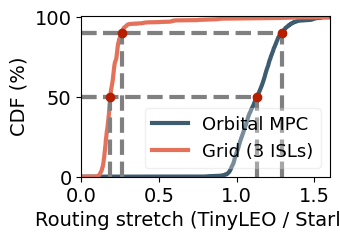

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def compute_cdf(data):
    """
    Compute the empirical CDF of given data.
    """
    data = np.sort(data)
    cdf = np.arange(1, len(data) + 1) * 100 / len(data)
    return data, cdf

def plot_cdf(data_list, labels, colors):
    """
    Plot CDF of routing stretch with annotated percentiles.
    
    Args:
        data_list (list of lists): Each list contains stretch values.
        labels (list of str): Labels for each curve.
        colors (list of str): Colors for each curve.
    """
    plt.figure(figsize=(3.5, 2.5))
    
    for stretches, label, color in zip(data_list, labels, colors):
        plot_stretches = stretches.copy()
        plot_stretches.append(0)  # Ensure CDF starts at 0

        x, y = compute_cdf(plot_stretches)

        plt.plot(x, y, label=label, color=color,
                 linewidth=4 if label == 'Shortest path propagation delay' else 3,
                 linestyle='-')

        # Compute 50% and 90% percentiles
        p50 = np.percentile(stretches, 50)
        p90 = np.percentile(stretches, 90)

        # Annotate percentiles
        plt.scatter([p50], [50], color="#B61E00", zorder=8)
        plt.scatter([p90], [90], color="#B61E00", zorder=8)
        plt.plot([p50, p50], [0, 50], color='gray', linestyle='--', linewidth=3)
        plt.plot([0, p50], [50, 50], color='gray', linestyle='--', linewidth=3)
        plt.plot([p90, p90], [0, 90], color='gray', linestyle='--', linewidth=3)
        plt.plot([0, p90], [90, 90], color='gray', linestyle='--', linewidth=3)

    plt.xlabel('Routing stretch (TinyLEO / Starlink)', fontsize=14)
    plt.ylabel('CDF (%)', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlim(0, 1.6)
    plt.ylim(0, 101)
    plt.yticks([0, 50, 100])

    # Add legend
    legend = plt.legend(fontsize=13, loc='lower right')
    legend.get_frame().set_alpha(0.3)

    plt.tight_layout()
    plt.savefig('figures/figure19a_3.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('figures/figure19a_3.png', dpi=300, bbox_inches='tight')
    plt.show()

# ------------------------
# Input data
# ------------------------

data_list = [shorest_stretch, grid_strech]
labels = ['Orbital MPC', 'Grid (3 ISLs)']
colors = ['#3D5C6F', '#E47159']

# Plot the CDF
plot_cdf(data_list, labels, colors)


In [11]:
p50 = np.percentile(shorest_stretch, 50)
p90 = np.percentile(shorest_stretch, 90)
print(f"50% stretch: {p50:.2f}, 90% stretch: {p90:.2f}, max stretch: {max(shorest_stretch):.2f}")

50% stretch: 1.13, 90% stretch: 1.29, max stretch: 1.63


In [12]:
p50 = np.percentile(grid_strech, 50)
p90 = np.percentile(grid_strech, 90)
print(f"50% stretch: {p50:.2f}, 90% stretch: {p90:.2f}, max stretch: {max(grid_strech):.2f}")

50% stretch: 0.19, 90% stretch: 0.26, max stretch: 1.58
